**03: post EDA processing and transformation**

Importing required modules

In [25]:
#linear algebra
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression

#extra
import os
import pickle
import datetime
import warnings

In [26]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Directory variables

In [27]:
processed_data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\processed_data.pkl"
# processed_new_data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\processed_new_data.pkl"
output_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs"
transformer_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\transformers"

Loading data

In [28]:
def load_processed_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

In [29]:
data = load_processed_data(processed_data_path)
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Feature engineering and data transformation 

In [30]:
#Fetching day, month, day_of_week from weak_start_date
def date_extraction(data):
    data.insert(1,"day",data.week_start_date.dt.day)
    data.insert(2,"month",data.week_start_date.dt.month)
    data.insert(3,"day_of_week",data.week_start_date.dt.day_of_week)
    data.drop(columns=["week_start_date"],inplace=True)
    return data

In [31]:
data = date_extraction(data)

In [32]:
data.head()

,city,day,month,day_of_week,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,30,4,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,7,5,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,14,5,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,21,5,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,28,5,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [33]:
# new_data = date_extraction(new_data)

- Removing outliers

In [34]:
outlier_columns = data.iloc[:, 6:-1].columns

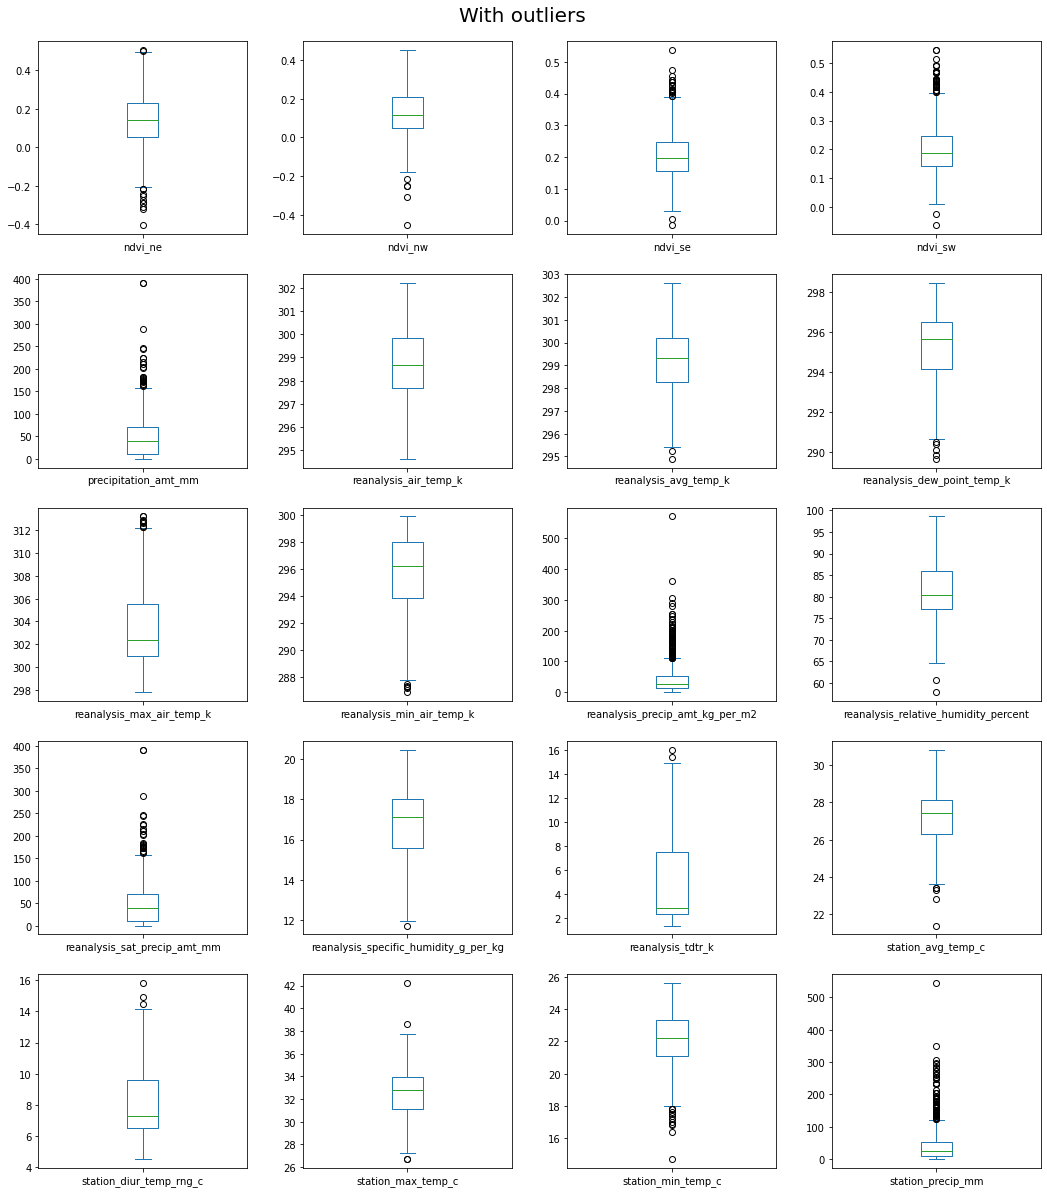

In [35]:
plt.figure(figsize=(15,17))
plt.suptitle("With outliers",fontsize=20)

for i in range(len(outlier_columns)):
    plt.subplot(5,4,i+1)
    data[outlier_columns[i]].plot(kind="box")
    
plt.tight_layout(pad=2)
plt.show()

In [36]:
def remove_outliers(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_data

In [37]:
filtered_data = remove_outliers(data, outlier_columns)

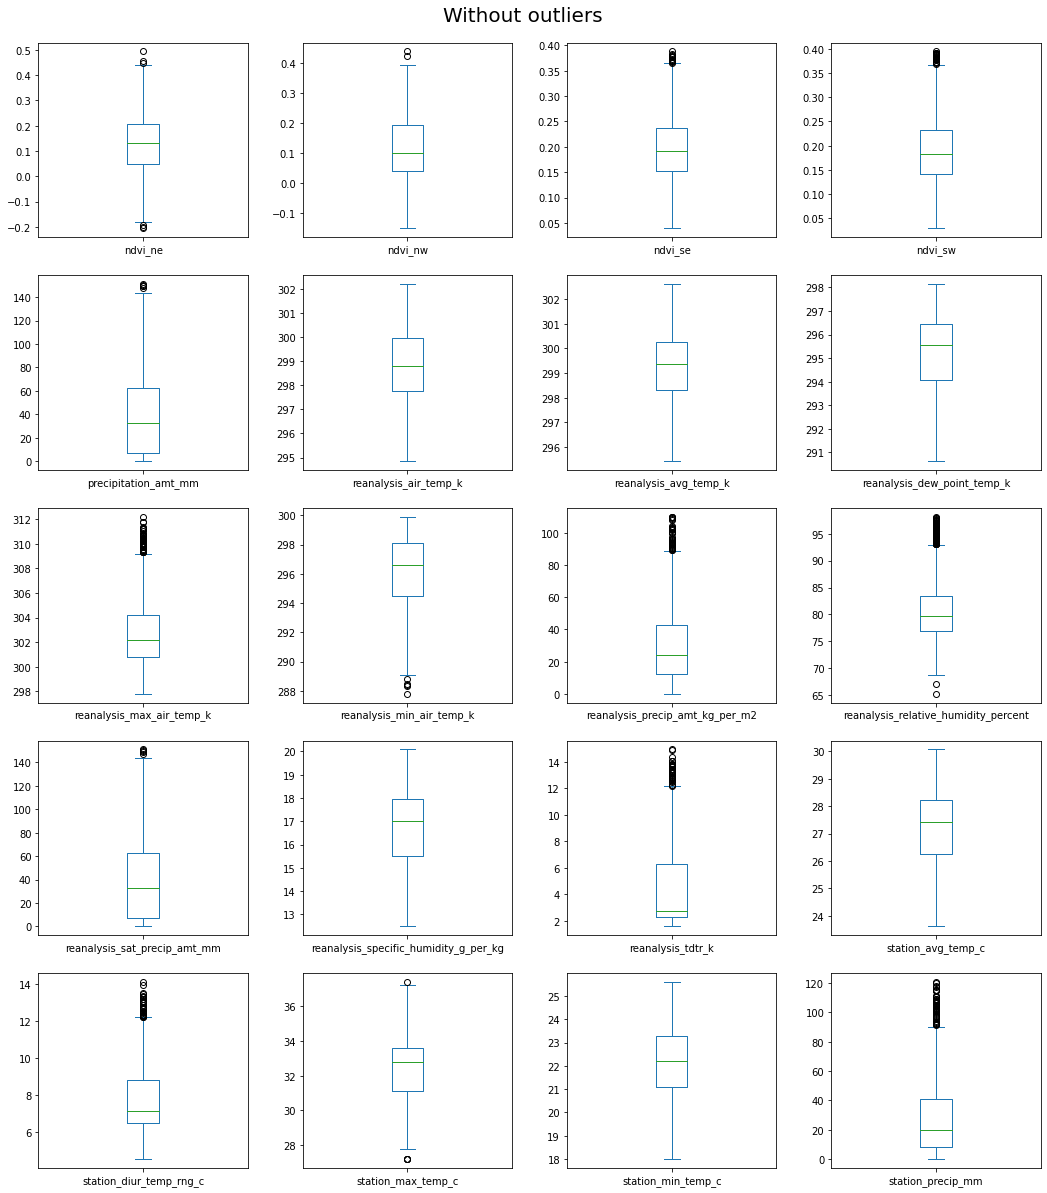

In [38]:
plt.figure(figsize=(15,17))
plt.suptitle("Without outliers",fontsize=20)

for i in range(len(outlier_columns)):
    plt.subplot(5,4,i+1)
    filtered_data[outlier_columns[i]].plot(kind="box")
    
plt.tight_layout(pad=2)
plt.show()

- Data scaling 

In [39]:
scaling_columns = data.iloc[:, 6:-1].columns

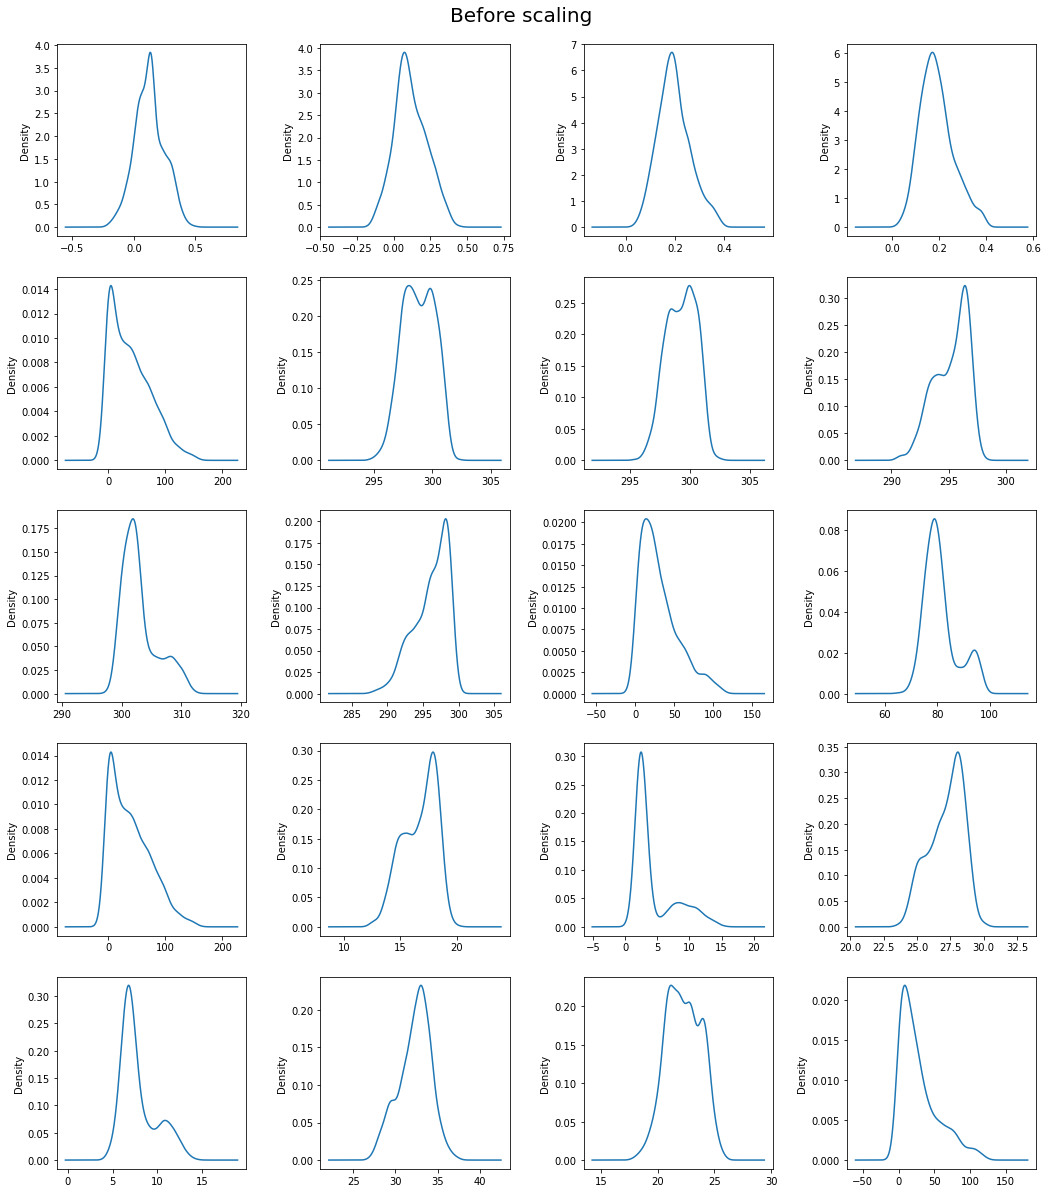

In [40]:
plt.figure(figsize=(15,17))
plt.suptitle("Before scaling",fontsize=20)

for i in range(len(scaling_columns)):
    plt.subplot(5,4,i+1)
    filtered_data[scaling_columns[i]].plot(kind="kde")
    
plt.tight_layout(pad=2)
plt.show()

In [41]:
def scale_data(data, columns):
    scalers = [('StandardScaler', StandardScaler()),
               ('MinMaxScaler', MinMaxScaler()),
               ('RobustScaler', RobustScaler()),
               ('PowerTransformer', PowerTransformer(method='yeo-johnson'))
              ]
    
    scaler_pipeline = Pipeline(scalers)
    data[columns] = scaler_pipeline.fit_transform(data[columns])
    transformer_data_path = os.path.join(transformer_dir, "scaler.pkl")
    with open(transformer_data_path, "wb") as file:
        pickle.dump(scaler_pipeline, file)
    return data

In [42]:
scaled_data = scale_data(filtered_data, scaling_columns)

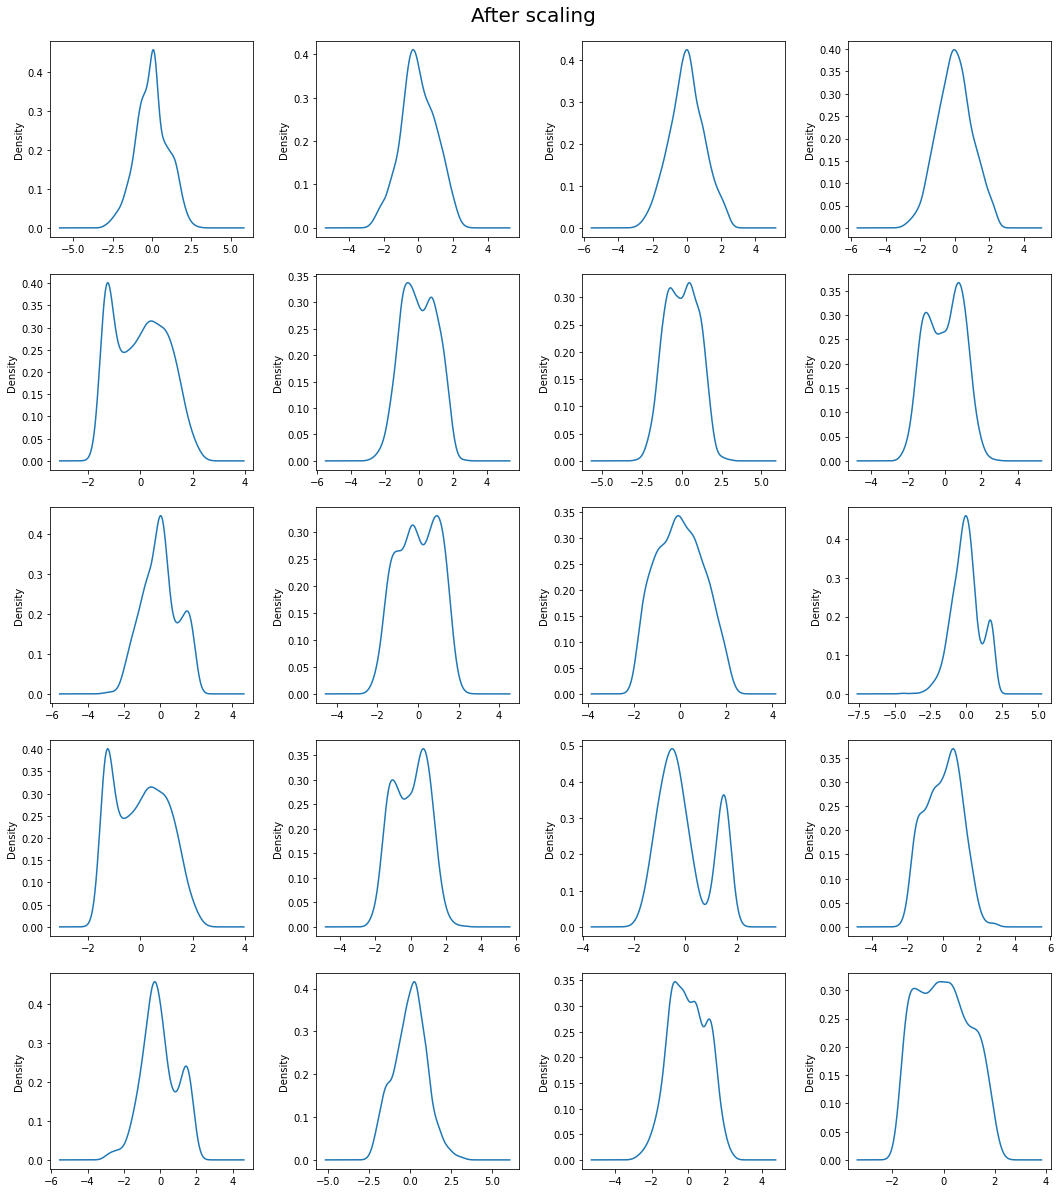

In [43]:
plt.figure(figsize=(15,17))
plt.suptitle("After scaling",fontsize=20)

for i in range(len(scaling_columns)):
    plt.subplot(5,4,i+1)
    scaled_data[scaling_columns[i]].plot(kind="kde")
    
plt.tight_layout(pad=2)
plt.show()

- Encoding categorical 

In [44]:
le = LabelEncoder()

In [45]:
scaled_data.city = le.fit_transform(scaled_data.city)

In [46]:
transformer_data_path = os.path.join(transformer_dir, "le.pkl")
with open(transformer_data_path, "wb") as file:
    pickle.dump(le, file)
    print("Transformer saved successfully")

Transformer saved successfully


In [47]:
scaled_data.head()

,city,day,month,day_of_week,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,30,4,0,1990,18,-0.016536,-0.045015,0.110036,-0.082612,-0.744185,-0.943302,-1.214591,-1.619633,-1.387852,-0.329611,0.335308,-1.566752,-0.744185,-1.587135,-0.368641,-1.291053,-0.300128,-1.448836,-1.484469,-0.272887,4
1,1,7,5,0,1990,19,0.377020,0.301500,-0.478241,-0.436839,-0.314551,-0.487879,-0.700195,-0.930554,-0.676998,-0.111301,-0.408830,-0.523304,-0.314551,-0.930743,-0.651463,-0.492902,-0.749960,-0.388845,-0.047147,-0.800602,5
2,1,14,5,0,1990,20,-0.792355,0.568155,-0.567387,-0.187652,0.097705,-0.071461,-0.367098,-0.035477,-0.919344,0.354113,0.061403,0.354093,0.097705,-0.045380,-0.738630,-0.492902,-0.645358,-0.133716,0.351279,0.798169,4
3,1,21,5,0,1990,21,0.034186,1.163593,0.537103,0.709611,-0.616682,0.081599,-0.090599,-0.124142,-0.400195,0.187881,-0.685225,0.075074,-0.616682,-0.164520,-0.584496,0.085830,-0.401578,0.476215,0.685422,-1.191951,3
4,1,28,5,0,1990,22,0.592251,1.300171,0.861593,0.847845,-0.967240,0.483642,0.267015,0.263463,-0.152622,0.471071,-0.810182,0.096439,-0.967240,0.215625,-0.025532,1.544761,0.952789,1.553328,1.088514,-1.032905,6


Saving data

In [48]:
transformed_data_path = os.path.join(output_dir, "transformed_data.pkl")
def save_transformed_data(data, file_path):
    with open(file_path, "wb") as file:
        pickle.dump(scaled_data, file)
        print("Data saved successfully")

save_transformed_data(scaled_data, transformed_data_path)

Data saved successfully
